In [ ]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/content/canada_per_capita_income.csv')

df.rename(columns={'per capita income (US$)':'price'},inplace=True)
df

,year,price
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583
5,1975,5998.144346
6,1976,7062.131392
7,1977,7100.126170
8,1978,7247.967035
9,1979,7602.912681


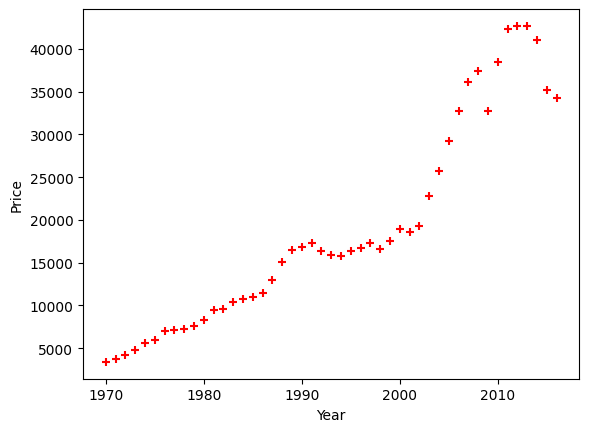

In [ ]:
reg=linear_model.LinearRegression()
reg.fit(df[['year']],df.price)

LinearRegression()

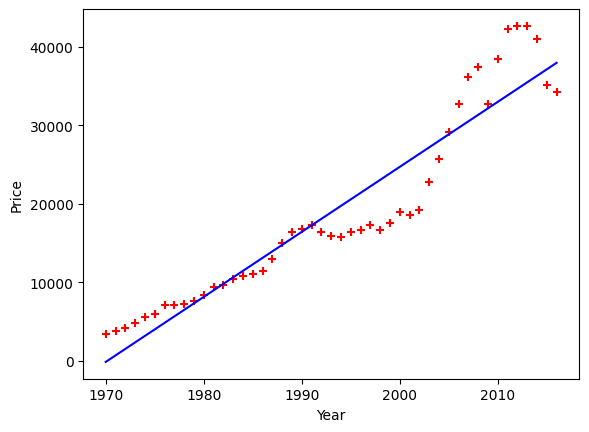

In [ ]:
%matplotlib inline
plt.xlabel('Year')
plt.ylabel('Price')
plt.scatter(df.year,df.price,color='red',marker='+')
plt.plot(df.year,reg.predict(df[['year']]),color='blue')

In [ ]:
reg.predict([[1997]])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([22233.9973643])

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model



In [37]:
df=pd.read_csv('hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [38]:
df.experience.fillna(0,inplace=True)
df


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [24]:
!pip install word2number

  Preparing metadata (setup.py) ... done
  Created wheel for word2number: filename=word2number-1.1-py3-none-any.whl size=5566 sha256=012ccef0ba3733f54bf20fba59ab6f968573fc4a4950c2ff4bb54ac0f8b3448a
  Stored in directory: /root/.cache/pip/wheels/84/ff/26/d3cfbd971e96c5aa3737ecfced81628830d7359b55fbb8ca3b
Successfully built word2number


In [39]:
from word2number import w2n
def word_to_num(word):
  print(word)
  try:
    return w2n.word_to_num(word)
  except ValueError:
    return word

df.experience=df['experience'].apply(word_to_num)
df

0
0
five
two
seven
three
ten
eleven


,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [42]:
med=df['test_score(out of 10)'].median()
med
df['test_score(out of 10)'].fillna(med,inplace=True)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,8.0,7,72000
7,11,7.0,8,80000


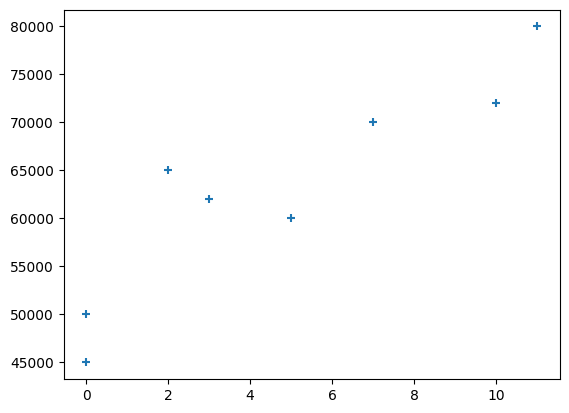

In [44]:
from sklearn import linear_model
import matplotlib.pyplot as plt
plt.scatter(df.experience,df['salary($)'],marker="+")

In [45]:
reg=linear_model.LinearRegression()
reg.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df['salary($)'])

LinearRegression()

In [46]:
reg.predict([[2,6,8]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([52079.33042213])